<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): Fabio Victor Galdino Nascimento

# Experimento 04: Morfologia Matemática

In [2]:
import os                            # Operational System para manipulação de arquivos.
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
import skimage.morphology            # Scikit-Image para produzir elementos estruturantes

O Scikit-Image pode ser instalado com: **conda install scikit-image**

## 1. Operações Lógicas em Imagens Binárias

É possível submeter imagens a operações lógicas de modo a obter novas imagens. Nesse contexto, a biblioteca OpenCV disponibiliza um conjunto de funções para implementação dessas operações:

1. AND: C = A $\cap$ B   
    * **C = cv2.bitwise_and( A, B )**
2. OR: $C = A \cup B$   
    * **C = cv2.bitwise_or( A, B )**
3. XOR: $C = A \oplus B$   
    * **C = cv2.bitwise_xor( A, B )**
4. Not: $C = \overline{A}$   
    * **C = ~A**
5. Diferença: C = A - B    
    *  $C = A \cap \overline{B} $
    
    
**Obs:** a função **cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY)** pode ser utilizada para binarizar imagens de tipo **uint**, sendo necessário informar o limiar de binarização e o valor do nível alto. A função retorna o limiar utilizado e a imagem binarizada, com pixels de nível alto setados para vmax e os demais para 0.

**a. Carregue as imagens “A.tif” e “B.tif”. Binarize as imagens e realize as operações abaixo:** 

1. $A$ 
2. $B$ 
3. $C = A \cap B$ 
4. $D = A - B$ 
5. $E = \overline{A}$  
6. $F = \overline{B}$ 
7. $G = A \cup B$ 
8. $H = B - A$ 

**Comente os resultados encontrados.**

Text(0.5, 1.0, 'Imagem $H = B - A$')

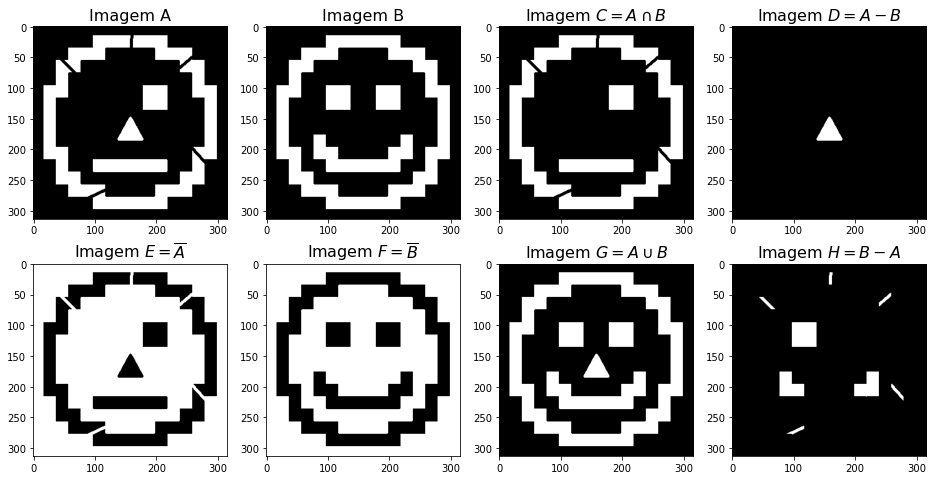

In [2]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(16, 8))

#Carrega as imagens
A = cv2.imread( os.path.join( ".", "images", "A.tif"), 0)
B = cv2.imread( os.path.join( ".", "images", "B.tif"), 0)

#Binarização
A_b = cv2.threshold( A , 127, 250, cv2.THRESH_BINARY)[1]
B_b = cv2.threshold( B , 127, 250, cv2.THRESH_BINARY)[1]

#Operações realizadas
C = cv2.bitwise_and( A_b, B_b )
D = cv2.bitwise_and( A_b, ~B_b )
E = ~A_b
F = ~B_b
G = cv2.bitwise_or( A_b, B_b )
H = cv2.bitwise_and( B_b, ~A_b )

#Plotagem das imagens
axs[0][0].imshow(A_b, cmap="gray")
axs[0][0].set_title("Imagem A", fontsize = 16)
axs[0][1].imshow(B_b, cmap="gray")
axs[0][1].set_title("Imagem B", fontsize = 16)
axs[0][2].imshow(C, cmap="gray")
axs[0][2].set_title("Imagem $C = A \cap B$", fontsize = 16)
axs[0][3].imshow(D, cmap="gray")
axs[0][3].set_title("Imagem $D = A - B$", fontsize = 16)
axs[1][0].imshow(E, cmap="gray")
axs[1][0].set_title("Imagem $E = \overline{A}$", fontsize = 16)
axs[1][1].imshow(F, cmap="gray")
axs[1][1].set_title("Imagem $F = \overline{B}$", fontsize = 16)
axs[1][2].imshow(G, cmap="gray")
axs[1][2].set_title("Imagem $G = A \cup B$", fontsize = 16)
axs[1][3].imshow(H, cmap="gray")
axs[1][3].set_title("Imagem $H = B - A$", fontsize = 16)

**Comentário:**

Ao realizar as operações podemos observar na prática a utilização da morfologia matemática nas imagens. Em que os resultados são bastantes análogos ao que já conhecemos na matemática e na programação, assim o estimando antes mesmo de realizar as operações. 

**b. O código abaixo aplica uma das máscaras binárias da questão anterior sobre uma imagem. Com relação à imagem resultante, responda:**
 * Qual o efeito de aplicar uma máscara binária sobre uma imagem?
 * Cite pelo menos duas possíveis aplicações dessa operação. Qual o papel das máscaras nessas aplicações?
 * Tendo em vista a quantidade de tons de cinza na máscara, qual a importância do tipo de interpolação utilizado?

Text(0.5, 1.0, 'Imagem Resultante')

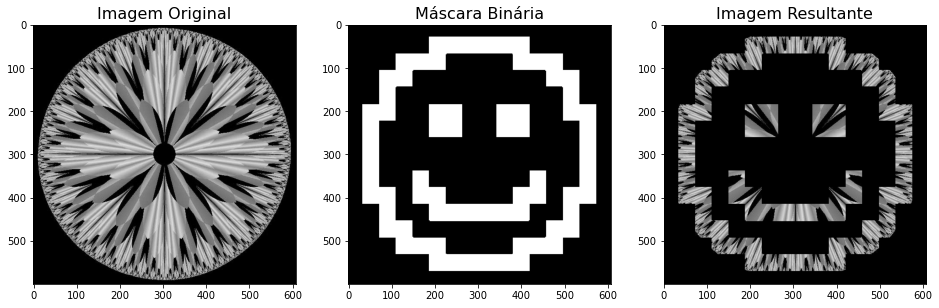

In [2]:
# Imagem Mandala
mandala = cv2.imread( os.path.join(".", "images", "mandala.jpg"), 0 )
H, W = mandala.shape

# Imagem B
B = cv2.imread( os.path.join(".", "images", "B.tif"), 0 )
_, B = cv2.threshold(B, 127, 255, cv2.THRESH_BINARY)
B_resized = cv2.resize(B, (W, H), interpolation = cv2.INTER_NEAREST)

# Imagem D
combined = cv2.bitwise_and( mandala, B_resized )

# Plotagem
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 8))

# Primeira Subfigura da Primeira Linha
axs[0].imshow(mandala, vmin=0, vmax=255, cmap="gray")
axs[0].set_title("Imagem Original", fontsize = 16)

# Segunda Subfigura da Primeira Linha
axs[1].imshow(B_resized, vmin=0, vmax=255, cmap="gray")
axs[1].set_title("Máscara Binária", fontsize = 16)

# Terceira Subfigura da Primeira Linha
axs[2].imshow(combined, vmin=0, vmax=255, cmap="gray")
axs[2].set_title("Imagem Resultante", fontsize = 16)

**Resposta:**

- Com a aplicação da máscara binaria, como o nome já diz a imagem resultante terá apenas 2 níveis o 0 e o 255, em que podemos determinar onde será a "divisão" do nível em que o computador identificará como branco ou preto. 

- Em filtros do Instagram, como por exemplo determinar uma forma para ser mostrada na câmera, entre muitas outra maneiras.
Na manipulação de imagens no Photoshop, capaz de fazer diversas aplicações na imagem.

- Esse processo é essencial quando vamos aumentar a imagem, em que realiza uma dedução dos pixels que não possuem informações.

## 2. Transformações Lineares

Também é possível realizar transformações lineares como rotação e translação com o OpenCV. Para isso, faz-se uso da função **warpAffine**.

**dst_img = cv2.warpAffine(src_img, M, (cols, rows))**

Descrição:  
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **M** corresponde à matriz de transformação utilizada;
* **rows** corresponde ao número de linhas da imagem;
* **cols** corresponde ao número de colunas da imagem;

Alguns exemplos de transformações que podem ser produzidas a partir desta função são:

1. Translações:
    * Para transladar a imagem Tx pixels para a direita e Ty pixels para baixo, faz-se uso de uma matriz com forma: 
    * **M = [ [1, 0, Tx], [0, 1, Ty] ]**
2. Rotações:
    * A matriz de transformação para uma rotacão de $\theta$ graus com relação ao ponto (Px, Py) pode ser obtida utilizando a função **getRotationMatrix2D**: 
    * **M = cv2.getRotationMatrix2D( (Px, Py), $\theta$, scale)**
3. Reflexão:
    * A imagem pode ser refletida utilizando as seguintes matrizes: 
    * **M = [ [-1, 0, cols-1], [0, 1, 0] ]**
    * **M = [ [1, 0, 0], [0, -1, rows-1] ]**

**a. O código abaixo implementa algumas das transformações descritas. Comente todas as linhas desse código e explique o que o programa faz.**
 * Que transformações são implementadas pelas matrizes Ma, Mb, Mc e Md?
 * As imagens 2 e 4 são diferentes apesar de terem sofrido as mesmas transformações. Por que isso aconteceu?

Text(0.5, 1.0, 'Imagem 6')

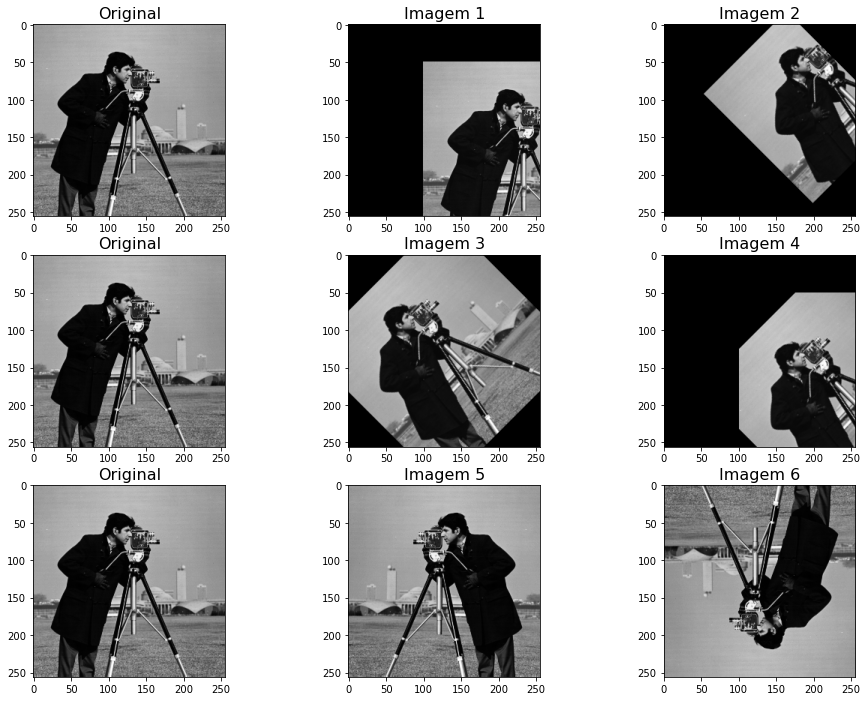

In [3]:
#Derermina os valores para a traslação nas coordenadas x, y. 
Tx    = 100
Ty    =  50
#Determina o valor para a rotação
theta =  45

#Carrega a imagem
src_img = cv2.imread( os.path.join(".", "images", "cameraman.jpg"), 0 )
#Obtem o número de linhas e colunas da imagem
rows, cols = src_img.shape

#Matriz utilizada para transladar a imagem
Ma = np.array( [ [1, 0, Tx], [0, 1, Ty] ], dtype=np.float32 )
#Matriz utilizada para rotacionar a imagem 
Mb = cv2.getRotationMatrix2D( (cols/2, rows/2),  theta , 1)
#Matriz utilizada para reflexão da imagem na horizontal
Mc = np.array( [[-1, 0, cols-1], [0, 1, 0]], dtype = np.float32 )
#Matriz utilizada para reflexão da imagem na vertical
Md = np.array( [[1, 0, 0], [0, -1, rows-1]], dtype = np.float32 )

# Plots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
axs[0][0].imshow(src_img, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da primeira linha
dst_img = cv2.warpAffine(src_img, Ma, (cols, rows))
axs[0][1].imshow(dst_img, cmap="gray")
axs[0][1].set_title("Imagem 1", fontsize = 16)

# Terceira Subfigura da primeira linha
dst_img = cv2.warpAffine(dst_img, Mb, (cols, rows))
axs[0][2].imshow(dst_img, cmap="gray")
axs[0][2].set_title("Imagem 2", fontsize = 16)

# Primeira Subfigura da segunda linha
axs[1][0].imshow(src_img, cmap="gray")
axs[1][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da segunda linha
dst_img = cv2.warpAffine(src_img, Mb, (cols, rows))
axs[1][1].imshow(dst_img, cmap="gray")
axs[1][1].set_title("Imagem 3", fontsize = 16)

# Terceira Subfigura da segunda linha
dst_img = cv2.warpAffine(dst_img, Ma, (cols, rows))
axs[1][2].imshow(dst_img, cmap="gray")
axs[1][2].set_title("Imagem 4", fontsize = 16)

# Primeira Subfigura da terceira linha
axs[2][0].imshow(src_img, cmap="gray")
axs[2][0].set_title("Original", fontsize = 16)

# Segunda Subfigura da terceira linha
dst_img = cv2.warpAffine(src_img, Mc, (cols, rows))
axs[2][1].imshow(dst_img, cmap="gray")
axs[2][1].set_title("Imagem 5", fontsize = 16)

# Terceira Subfigura da terceira linha
dst_img = cv2.warpAffine(dst_img, Md, (cols, rows))
axs[2][2].imshow(dst_img, cmap="gray")
axs[2][2].set_title("Imagem 6", fontsize = 16)

**Resposta:**

Apesar de sofrer a mesma transformação, a imagem 2 faz a rotação da imagem 1. Por outro lado a imagem 4 faz a translação da imagem 2.

**b. Abra a imagem Seta.tif, realize operações abaixo e comente os resultados obtidos.**
 * Translação de -50 pixels na horizontal e   0 pixels na vertical.
 * Translação de 125 pixels na horizontal e -75 pixels na vertical.
 * Reflexão horizontal.
 * Reflexão vertical.
 * Rotação de -25° com relação ao ponto (x =  59, y =  78) e escala   1.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala   3.
 * Rotação de  25° com relação ao ponto (x = 118, y = 118) e escala 1/3.
 * Rotação de   0° com relação ao ponto (x =  59, y =  59) e escala 1/4.

Text(0.5, 1.0, 'X = 59, Y = 59 / 0° / Escala = 1/4')

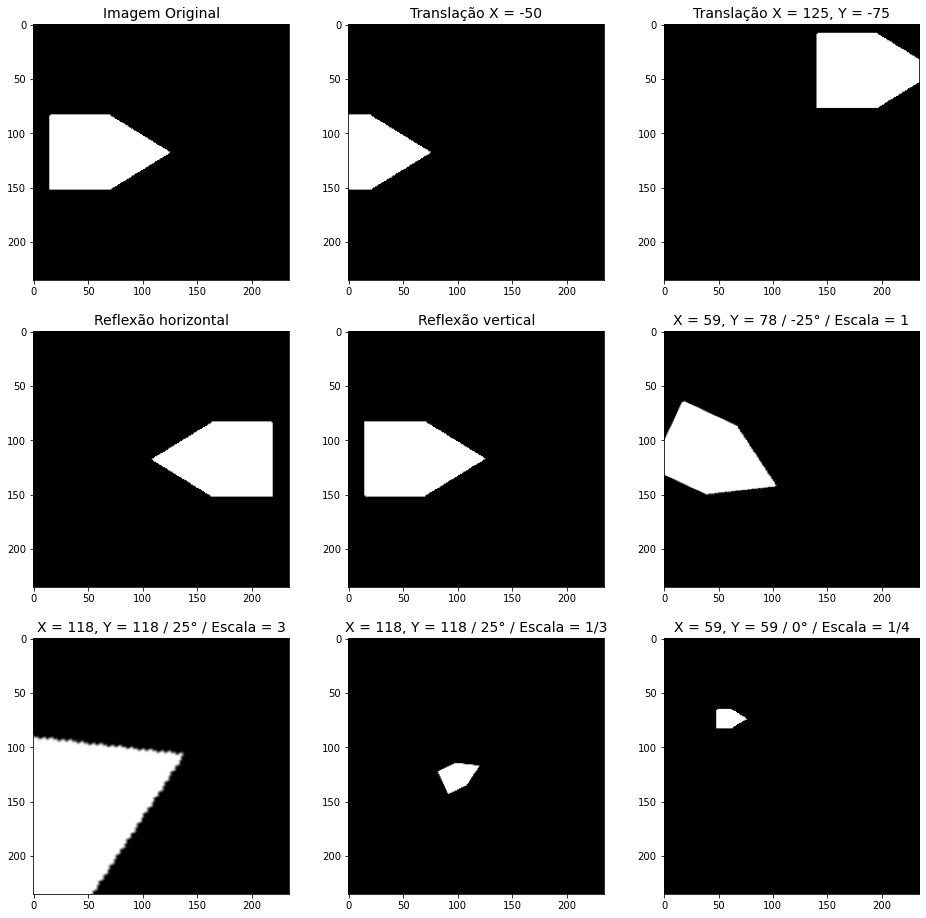

In [32]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 16))

Img = cv2.imread( os.path.join(".", "images", "Seta.tif"), 0 )
rows, cols = src_img.shape

axs[0][0].imshow(Img, cmap="gray")
axs[0][0].set_title("Imagem Original", fontsize = 14)

Ma = np.array( [ [1, 0, -50], [0, 1, 0] ], dtype=np.float32 )
Img_A = cv2.warpAffine(Img, Ma, (cols, rows))
axs[0][1].imshow(Img_A, cmap="gray")
axs[0][1].set_title("Translação X = -50", fontsize = 14)

Mb = np.array( [ [1, 0, 125], [0, 1, -75] ], dtype=np.float32 )
Img_B = cv2.warpAffine(Img, Mb, (cols, rows))
axs[0][2].imshow(Img_B, cmap="gray")
axs[0][2].set_title("Translação X = 125, Y = -75", fontsize = 14)

Mc = np.array( [[-1, 0, cols-1], [0, 1, 0]], dtype = np.float32 )
Img_C = cv2.warpAffine(Img, Mc, (cols, rows))
axs[1][0].imshow(Img_C, cmap="gray")
axs[1][0].set_title("Reflexão horizontal", fontsize = 14)

Md = np.array( [[1, 0, 0], [0, -1, rows-1]], dtype = np.float32 )
Img_D = cv2.warpAffine(Img, Md, (cols, rows))
axs[1][1].imshow(Img_D, cmap="gray")
axs[1][1].set_title("Reflexão vertical", fontsize = 14)

Me = cv2.getRotationMatrix2D( (59, 78),  -25 , 1)
Img_E = cv2.warpAffine(Img, Me, (cols, rows))
axs[1][2].imshow(Img_E, cmap="gray")
axs[1][2].set_title("X = 59, Y = 78 / -25° / Escala = 1", fontsize = 14)

Mf = cv2.getRotationMatrix2D( (118, 118),  25 , 3)
Img_F = cv2.warpAffine(Img, Mf, (cols, rows))
axs[2][0].imshow(Img_F, cmap="gray")
axs[2][0].set_title("X = 118, Y = 118 / 25° / Escala = 3", fontsize = 14)

Mg = cv2.getRotationMatrix2D( (118, 118),  25 , 1/3)
Img_G = cv2.warpAffine(Img, Mg, (cols, rows))
axs[2][1].imshow(Img_G, cmap="gray")
axs[2][1].set_title("X = 118, Y = 118 / 25° / Escala = 1/3", fontsize = 14)

Mh = cv2.getRotationMatrix2D( (59, 59),  0 , 1/4)
Img_H = cv2.warpAffine(Img, Mh, (cols, rows))
axs[2][2].imshow(Img_H, cmap="gray")
axs[2][2].set_title("X = 59, Y = 59 / 0° / Escala = 1/4", fontsize = 14)

**Comentário:**

Ao realizar os seguintes passos, podemos praticar o que aprendemos em relação as transformações lineares. Em que podemos modificar a posição da imagem diante ao espaço sem alterar os valores dos pixels. 

## 3. Dilatação e Erosão

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de erosão (1) e dilatação (2). A sintaxe das funções é: 

 1. **dst_img = cv2.erode( src_img, kernel, iterations = 1 )**    
 2. **dst_img = cv2.dilate( src_img, kernel, iterations = 1 )**    

Descrição:
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **kernel** representa o elemento estruturante;
* **iterations** corresponde ao número de vezes que a operação deve ser repetida.

Elementos estruturantes podem ser produzidos a partir de arrays do numpy.

**a. Carregue a imagem 'text.tif' e utilize o elemento estruturante abaixo para produzir uma versão dilatada da imagem e outra versão erodida. Comente os resultados encontrados.**
 * **kernel = np.array( [ [1, 0, 1], [0, 1, 0], [1, 0, 1] ], dtype = np.uint8 )**

Text(0.5, 1.0, 'Imagem Dilatada')

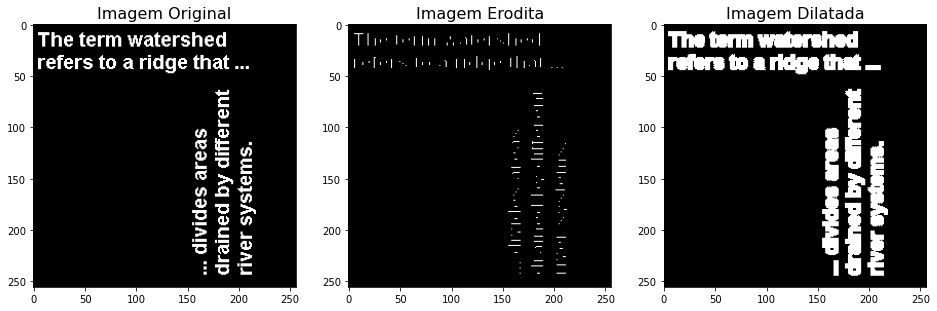

In [41]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 8))

Img2 = cv2.imread( os.path.join(".", "images", "text.tif"), 0 )

kernel = np.array( [ [1, 0, 1], [0, 1, 0], [1, 0, 1] ], dtype = np.uint8 )

Img2_E = cv2.erode( Img2, kernel, iterations = 1 )
Img2_D = cv2.dilate( Img2, kernel, iterations = 1 )

axs[0].imshow(Img2, cmap="gray")
axs[0].set_title("Imagem Original", fontsize = 16)

axs[1].imshow(Img2_E, cmap="gray")
axs[1].set_title("Imagem Erodita", fontsize = 16)

axs[2].imshow(Img2_D, cmap="gray")
axs[2].set_title("Imagem Dilatada", fontsize = 16)

**Comentário:**

Desta forma podemos observar o que aprendemos na aula, em que na erosão ocorre uma certa "afinada", já que os elementos relevantes da imagem precisam coincidir com os do elemento estruturante. Enquanto na dilatação acontece o contrário, tendo em vista que apenas um elemento relevante precisa coincidir. 

Elementos estruturantes também podem ser produzidos pela função **getStructuringElement** do OpenCV:

 * **kernel = cv2.getStructuringElement( FLAG, (W,H) )**

Descrição:
* **kernel** representa o elemento estruturante;
* **(W, H)** é uma tupla com as dimensões do elemento estruturante;
* **FLAG** é um parâmetro que indica o tipo de elemento estruturante produzido, pode ser:
    * **cv2.MORPH_RECT** produz um elemento retangular;
    * **cv2.MORPH_ELLIPSE** produz um elemento elíptico;
    * **cv2.MORPH_CROSS** produz um elemento em forma de cruz;

Text(0.5, 1.0, 'cv2.MORPH_CROSS')

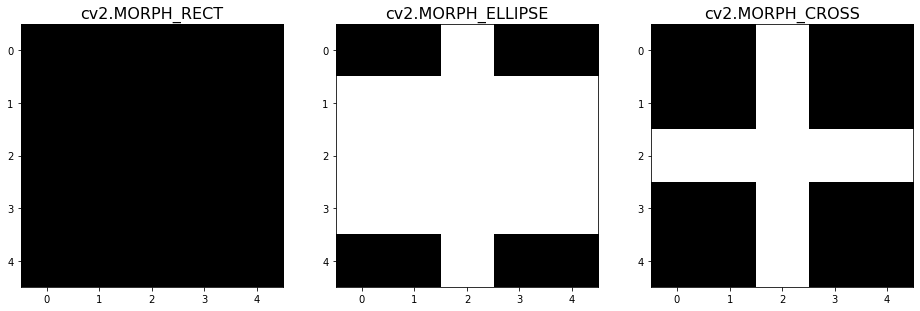

In [42]:
H = 5
W = 5

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (W,H) )
axs[0].imshow(kernel, cmap="gray")
axs[0].set_title("cv2.MORPH_RECT", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (W,H) )
axs[1].imshow(kernel, cmap="gray")
axs[1].set_title("cv2.MORPH_ELLIPSE", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = cv2.getStructuringElement( cv2.MORPH_CROSS, (W,H) )
axs[2].imshow(kernel, cmap="gray")
axs[2].set_title("cv2.MORPH_CROSS", fontsize = 16)

Ou ainda utilizando as funções do Scikit-Image:

 * **kernel = skimage.morphology.square( H )**
 * **kernel = skimage.morphology.rectangle( H, W )**
 * **kernel = skimage.morphology.diamond( H )**
 * **kernel = skimage.morphology.disk( R )**
 * **kernel = skimage.morphology.octagon( M, N )**
 * **kernel = skimage.morphology.star( A)**

Text(0.5, 1.0, 'Star')

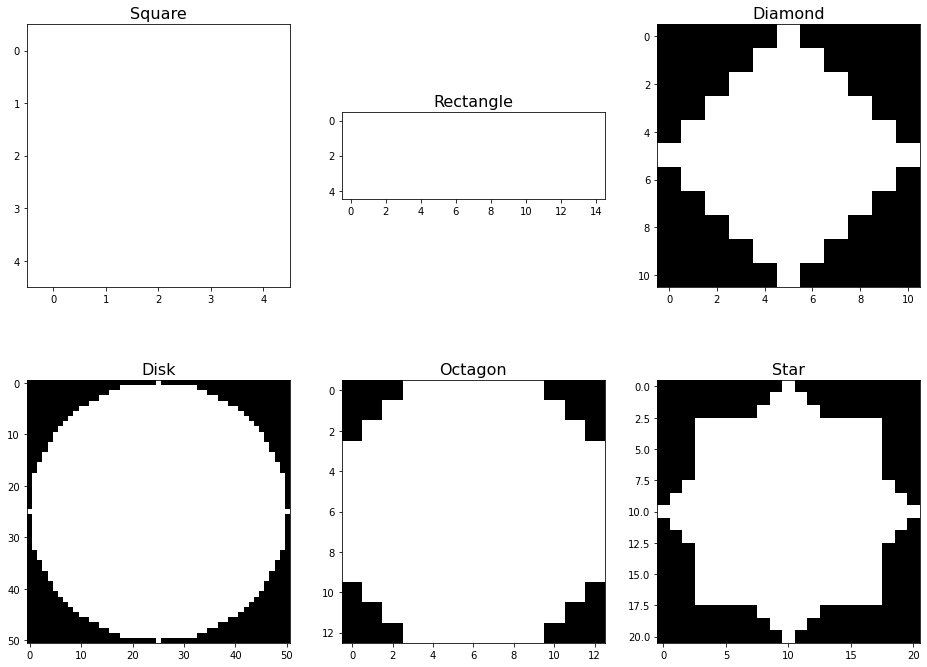

In [5]:
H =  5 # Altura do quadrado/retângulo e lado do diamante
W = 15 # Largura do retângulo
R = 25 # Raio do disco
M =  7 # Comprimento dos lados retos do octágono
N =  3 # Comprimento dos lados inclinados do octágono
A =  7 # Variável que controla o tamanho da estrela, o quadrado que a contém tem lado H = 2*a + 1 + 2*floor(a / 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
kernel = skimage.morphology.square( H )
axs[0][0].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][0].set_title("Square", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = skimage.morphology.rectangle( H, W )
axs[0][1].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][1].set_title("Rectangle", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = skimage.morphology.diamond( H )
axs[0][2].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[0][2].set_title("Diamond", fontsize = 16)

# Primeira Subfigura da segunda linha
kernel = skimage.morphology.disk( R )
axs[1][0].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][0].set_title("Disk", fontsize = 16)

# Segunda Subfigura da segunda linha
kernel = skimage.morphology.octagon( M, N )
axs[1][1].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][1].set_title("Octagon", fontsize = 16)

# Terceira Subfigura da segunda linha
kernel = skimage.morphology.star( A )
axs[1][2].imshow(kernel, vmin=0, vmax=1, cmap="gray")
axs[1][2].set_title("Star", fontsize = 16)

Text(0.5, 1.0, 'Linha Vertical de 5 pontos')

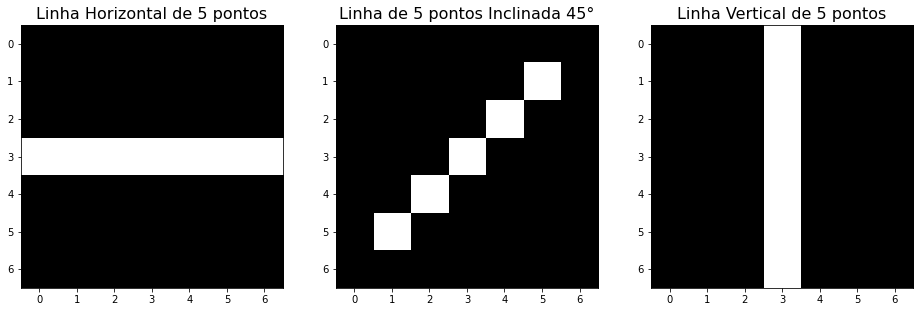

In [6]:
# Elemento estruturante correspondente a uma linha horizontal
orig_kernel  = np.zeros( (7, 7), dtype = np.uint8 )
orig_kernel[3, :] = 1

# Matriz de rotação para 45°
M = cv2.getRotationMatrix2D( (3, 3),  45 ,   1)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 12))

# Primeira Subfigura da primeira linha
axs[0].imshow(orig_kernel, cmap="gray")
axs[0].set_title("Linha Horizontal de 5 pontos", fontsize = 16)

# Segunda Subfigura da primeira linha
kernel = cv2.warpAffine(orig_kernel, M, (7, 7))
axs[1].imshow(kernel, cmap="gray")
axs[1].set_title("Linha de 5 pontos Inclinada 45°", fontsize = 16)

# Terceira Subfigura da primeira linha
kernel = cv2.warpAffine(kernel, M, (7, 7))
axs[2].imshow(kernel, cmap="gray")
axs[2].set_title("Linha Vertical de 5 pontos", fontsize = 16)

**b. Usando as funções mostradas, gere os seguintes elementos estruturantes para dilatar a imagem 'text.tif'. Mostre as imagens resultantes e comente os resultados encontrados.**
 * Disco de raio 9;
 * Estrela com A = 13;
 * Linha vertical de 11 pontos de tamanho;
 * Linha vertical de 9 pontos de tamanho;

Text(0.5, 1.0, 'Linha vertical 9 pontos')

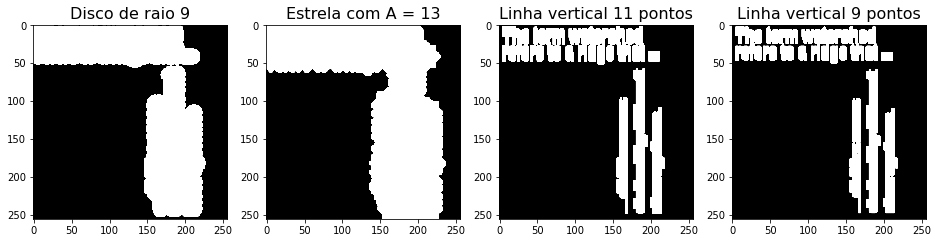

In [53]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16, 5))

disk_kernel = skimage.morphology.disk( 9 )
Img2_R9 = cv2.dilate( Img2, disk_kernel, iterations = 1 )
axs[0].imshow(Img2_R9, vmin=0, vmax=1, cmap="gray")
axs[0].set_title("Disco de raio 9", fontsize = 16)


star_kernel = skimage.morphology.star( 13 )
Img2_A13 = cv2.dilate( Img2, star_kernel, iterations = 1 )
axs[1].imshow(Img2_A13, vmin=0, vmax=1, cmap="gray")
axs[1].set_title("Estrela com A = 13", fontsize = 16)

verical_1  = np.zeros( (11, 11), dtype = np.uint8 )
verical_1[:, 5] = 1
Img2_V11 = cv2.dilate( Img2, verical_1, iterations = 1 )
axs[2].imshow(Img2_V11, vmin=0, vmax=1, cmap="gray")
axs[2].set_title("Linha vertical 11 pontos", fontsize = 16)

verical_2  = np.zeros( (9, 9), dtype = np.uint8 )
verical_2[:, 4] = 1
Img2_V9 = cv2.dilate( Img2, verical_2, iterations = 1 )
axs[3].imshow(Img2_V9, vmin=0, vmax=1, cmap="gray")
axs[3].set_title("Linha vertical 9 pontos", fontsize = 16)

**Comentário:**

Podemos observar que o processo de dilatação depende muito do seu elemento estruturante, em que precisamos analisar bem o mais adequado para determinada funcionalidade.

**c. Realize a erosão na imagem 'wirebond_mask.tif' com um elemento estruturante formado por um diamante de raio 6. Varie o tamanho (raio) do elemento estruturante para 4 e 8 e mostre os resultados. Comente os resultados encontrados.**

Text(0.5, 1.0, 'Com Raio = 8')

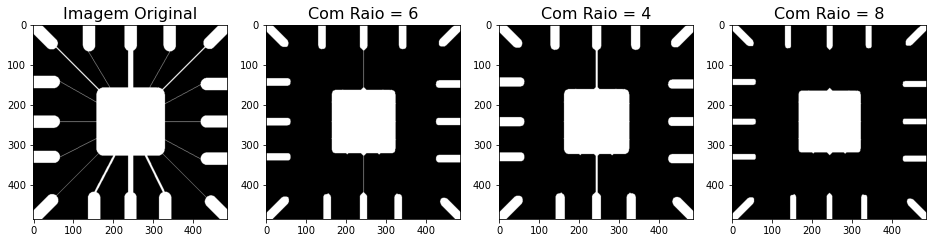

In [59]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(16, 5))

Img3 = cv2.imread( os.path.join(".", "images", "wirebond_mask.tif"), 0 )

axs[0].imshow(Img3, cmap="gray")
axs[0].set_title("Imagem Original", fontsize = 16)

diamond_1 = skimage.morphology.diamond( 6 )
Img3_R6 = cv2.erode( Img3, diamond_1, iterations = 1 )
axs[1].imshow(Img3_R6, cmap="gray")
axs[1].set_title("Com Raio = 6", fontsize = 16)

diamond_2 = skimage.morphology.diamond( 4 )
Img3_R4 = cv2.erode( Img3, diamond_2, iterations = 1 )
axs[2].imshow(Img3_R4, cmap="gray")
axs[2].set_title("Com Raio = 4", fontsize = 16)

diamond_3 = skimage.morphology.diamond( 8 )
Img3_R8 = cv2.erode( Img3, diamond_3, iterations = 1 )
axs[3].imshow(Img3_R8, cmap="gray")
axs[3].set_title("Com Raio = 8", fontsize = 16)

**Comentário:**

Desta forma podemos observar como a erosão pode remover alguns detalhes da imagem, dependendo assim do valor do Raio para determinar o quanto quero alterar a imagem original. 

## 4. Abertura e Fechamento

A partir de um elemento estruturante é possível utilizar funções do OpenCV para realizar as transformações morfológicas de abertura e fechamento a partir de uma mesma função. Sua sintaxe é: 

 * **dst_img = cv2.morphologyEx(src_img, FLAG, kernel)**       

Descrição:
* **dst_img** representa a imagem de saída;
* **src_img** representa a imagem de entrada;
* **kernel** representa o elemento estruturante;
* **FLAG** é um parâmetro que indica a transformação realizada, pode ser:
    * **cv2.MORPH_OPEN** realiza uma operação de abertura;
    * **cv2.MORPH_CLOSE** realiza uma operação de fechamento;
    * **cv2.MORPH_GRADIENT** realiza uma operação de gradiente morfológico (diferença entre as versões dilatada e erodida de uma imagem);
    * **cv2.MORPH_TOPHAT** realiza uma operação de Tophat (diferença entre a imagem original e sua versão após abertura);
    * **cv2.MORPH_BLACKHAT** realiza uma operação de Blackhat (diferença entre a versão da imagem após fechamento e a original);

**a. Aplicar os seguintes filtros morfológicos na imagem 'shapes.tif':**
 * Abertura, utilizando um elemento estruturante quadrado (square) de altura 10.
 * Fechamento, utilizando um elemento estruturante quadrado de altura 10.
 * Uma abertura seguida de um fechamento, um elemento estruturante quadrado de altura 10.
 * Repetir o item anterior variando a altura do elemento estruturante para 5 e depois para 15. Analise os resultados encontrados.

**Comente os resultados encontrados em todos os itens acima.**

Text(0.5, 1.0, 'Abertura - Fechamento / H = 15')

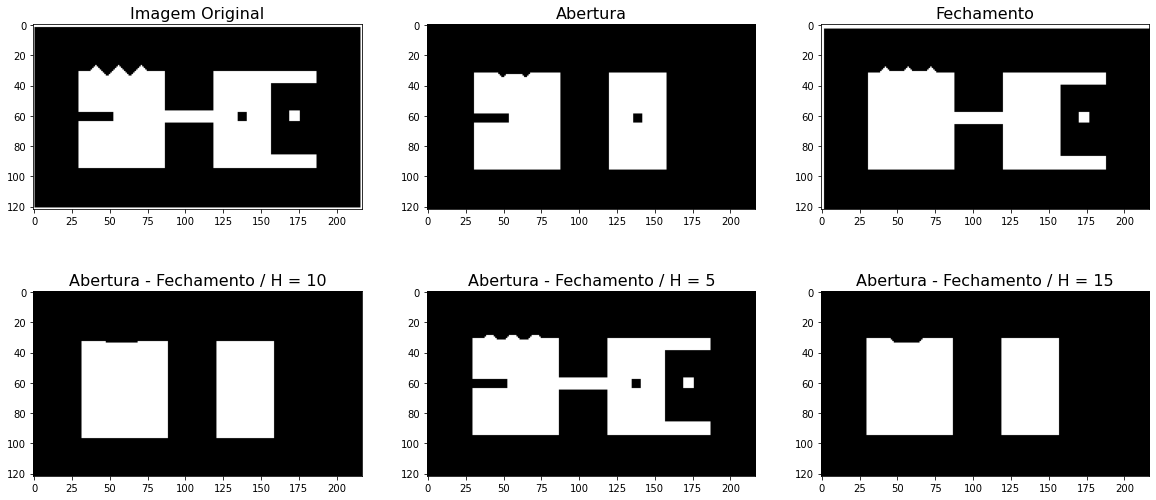

In [4]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 9))

Img4 = cv2.imread( os.path.join(".", "images", "shapes.tif"), 0 )

square10 = skimage.morphology.square( 10 )
square5 = skimage.morphology.square( 5 )
square15 = skimage.morphology.square( 15 )

axs[0][0].imshow(Img4, cmap="gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)

Img4_A = cv2.morphologyEx(Img4, cv2.MORPH_OPEN, square10)
axs[0][1].imshow(Img4_A, cmap="gray")
axs[0][1].set_title("Abertura", fontsize = 16)

Img4_F = cv2.morphologyEx(Img4, cv2.MORPH_CLOSE, square10)
axs[0][2].imshow(Img4_F, cmap="gray")
axs[0][2].set_title("Fechamento", fontsize = 16)

Img4_F2 = cv2.morphologyEx(Img4_A, cv2.MORPH_CLOSE, square10)
axs[1][0].imshow(Img4_F2, cmap="gray")
axs[1][0].set_title("Abertura - Fechamento / H = 10", fontsize = 16)

Img4_A2 = cv2.morphologyEx(Img4, cv2.MORPH_OPEN, square5)
Img4_F3 = cv2.morphologyEx(Img4_A2, cv2.MORPH_CLOSE, square5)
axs[1][1].imshow(Img4_F3, cmap="gray")
axs[1][1].set_title("Abertura - Fechamento / H = 5", fontsize = 16)

Img4_A3 = cv2.morphologyEx(Img4, cv2.MORPH_OPEN, square15)
Img4_F4 = cv2.morphologyEx(Img4_A3, cv2.MORPH_CLOSE, square15)
axs[1][2].imshow(Img4_F4, cmap="gray")
axs[1][2].set_title("Abertura - Fechamento / H = 15", fontsize = 16)

**Comentário:**
    
Abertura: Ela suaviza a imagem tornando os contornos menos agudos.

Fechamento: Como o nome já diz ela fecha alguns buracos na imagem, também deixando com as bordas arredondadas. 

Abertura e Fechamento: Realizasse os dois processos anteriores, mostrando a mudança que ocorre com a alteração da altura do elemento estruturante.

**a. Aplique os seguintes filtros morfológicos na imagem 'finger.jpg':**
 * Abertura, utilizando um elemento estruturante em formato de disco de raio 1.
 * Fechamento, utilizando um elemento estruturante em formato de disco de raio 1.
 * Uma abertura seguida de um fechamento com um elemento estruturante em formato de disco de raio 1.
 * Um fechamento seguido de uma abertura com um elemento estruturante em formato de disco de raio 1.
 
**Comente os resultados encontrados em todos os itens acima.**

Text(0.5, 1.0, 'Fechamento - Abertura')

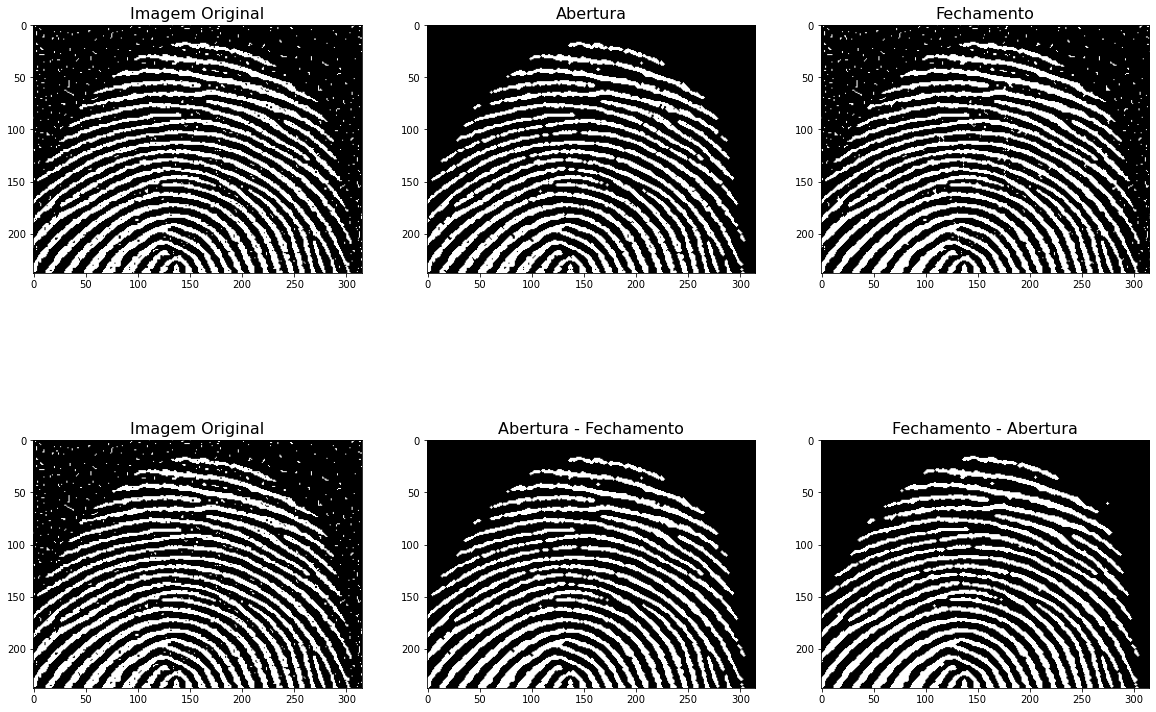

In [14]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 14))

Img5 = cv2.imread( os.path.join(".", "images", "finger.jpg"), 0 )
Disk1 = skimage.morphology.disk( 1 )

axs[0][0].imshow(Img5, cmap="gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)

Img5_A = cv2.morphologyEx(Img5, cv2.MORPH_OPEN, Disk1)
axs[0][1].imshow(Img5_D1, cmap="gray")
axs[0][1].set_title("Abertura", fontsize = 16)

Img5_F = cv2.morphologyEx(Img5, cv2.MORPH_CLOSE, Disk1)
axs[0][2].imshow(Img5_F, cmap="gray")
axs[0][2].set_title("Fechamento", fontsize = 16)

axs[1][0].imshow(Img5, cmap="gray")
axs[1][0].set_title("Imagem Original", fontsize = 16)

Img5_F2 = cv2.morphologyEx(Img5_A, cv2.MORPH_CLOSE, Disk1)
axs[1][1].imshow(Img5_F2, cmap="gray")
axs[1][1].set_title("Abertura - Fechamento", fontsize = 16)

Img5_A2 = cv2.morphologyEx(Img5_F, cv2.MORPH_OPEN, Disk1)
axs[1][2].imshow(Img5_A2, cmap="gray")
axs[1][2].set_title("Fechamento - Abertura", fontsize = 16)

**Comentário:**

Podemos observar como as operações podem ser uteis no melhoramento das informações da imagem.

Na abertura: Foi possível retirar alguns ruídos, porém piorou a informação da digital.

No fechamento: Foi possível melhorar a informação da digital, porém aumentou um pouco o ruido. 

Abertura - Fechamento / Fechamento abertura: Melhoraram tanto a eliminação de ruido, quanto a questão da informação da digital. Vale ressaltar que apesar de estarem bem parecidas, não possuem o mesmo resultado, então precisamos ter cuidado em realizar a devida escolha em determinada circunstância.
